# Making clusters

#### Importing libraries

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from random import randint
from time import sleep
from itertools import islice
from pandas import json_normalize

# Reading out the data and creating a dataframe

In [2]:
df_list = []
for i in range(1,101):
    df_list.append(pd.read_csv('./Data/part'+str(i)+'.csv'))    

In [3]:
df_songs = pd.concat(df_list)

In [4]:
df_songs.head(3)

,uri,title,artist_name,artist_id,album_id,album_name,length,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,06HL4z0CvFAxyc27GXpf02,0HG8fMDhvN2tH5uPHFsyZP,...Ready For It?,208198,False,0,0.615,0.779,2,-6.454,1,0.1350,0.0665,0.0,0.1550,0.453,160.000
1,spotify:track:4Vxu50qVrQcycjRyJQaZLC,Life Changes,Thomas Rhett,6x2LnllRG5uGarZMsD4iO8,4w5Jvreahp3yvLqc4vCr9I,Life Changes,190226,False,63,0.687,0.845,7,-4.370,1,0.0576,0.1000,0.0,0.0452,0.809,87.972
2,spotify:track:6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,0du5cEVh5yTK9QJze8zA0C,4PgleR09JVnm3zY1fW3XBA,24K Magic,225983,False,81,0.818,0.803,1,-4.282,1,0.0797,0.0340,0.0,0.1530,0.632,106.970


In [5]:
df_songs.shape

(10000, 20)

# Preparing the dataframe

#### More imports

In [6]:
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans

#### Reducing columns

In [7]:
df_songs.columns

Index(['uri', 'title', 'artist_name', 'artist_id', 'album_id', 'album_name',
       'length', 'explicit', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')

Most of the data we have is not needed for the clustering process, we only keep the audio features.

In [8]:
df_prep = df_songs[['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']]
df_prep.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

#### Cleaning

In [9]:
# Check nan values
df_prep.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [10]:
# Checking types
df_prep.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

There is nothing to clean

#### Scaling

In [11]:
scaler = StandardScaler().fit(df_prep)
scaler

StandardScaler()

In [12]:
normalized = scaler.transform(df_prep)
df_normalized = pd.DataFrame(normalized, columns=df_prep.columns)

In [13]:
df_normalized.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.291492,0.568800,-0.892376,0.271423,0.731221,0.881509,-0.589497,-0.402221,-0.189664,-0.072293,1.373173
1,0.716212,0.857708,0.499005,0.739069,0.731221,-0.155245,-0.474319,-0.402221,-0.903138,1.350445,-1.099348
2,1.488967,0.673857,-1.170652,0.758816,0.731221,0.140779,-0.701237,-0.402221,-0.202660,0.643073,-0.447200
3,0.344582,0.993407,1.055557,0.962570,0.731221,0.412693,-0.565430,-0.402221,0.927982,1.238544,-0.688417
4,0.285593,-1.182156,-0.335823,-0.632004,0.731221,-0.289192,1.268825,-0.400333,-0.556148,-1.079399,-0.412220


# Clustering with KMeans

In [14]:
# Initializing the classifier
kmeans = cluster.KMeans(n_clusters=10)

In [15]:
# Fitting with our scaled data
kmeans.fit(df_normalized)

D:\Users\Giancarlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [16]:
# Calculating the clusters
pred = kmeans.predict(df_normalized)

In [17]:
# We now have predictions for all our songs
len(pred)

10000

In [18]:
# Seperated into 10 clusters
pd.DataFrame(pred)[0].unique()

array([2, 0, 5, 1, 9, 6, 3, 8, 7, 4])

# Evaluation

In [19]:
# Looking at inertia
kmeans.inertia_ 

55372.102133484565

# Choosing k

D:\Users\Giancarlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Giancarlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Giancarlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Giancarlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Giancarlo\anaconda3\lib\site-pa

NameError: name 'np' is not defined

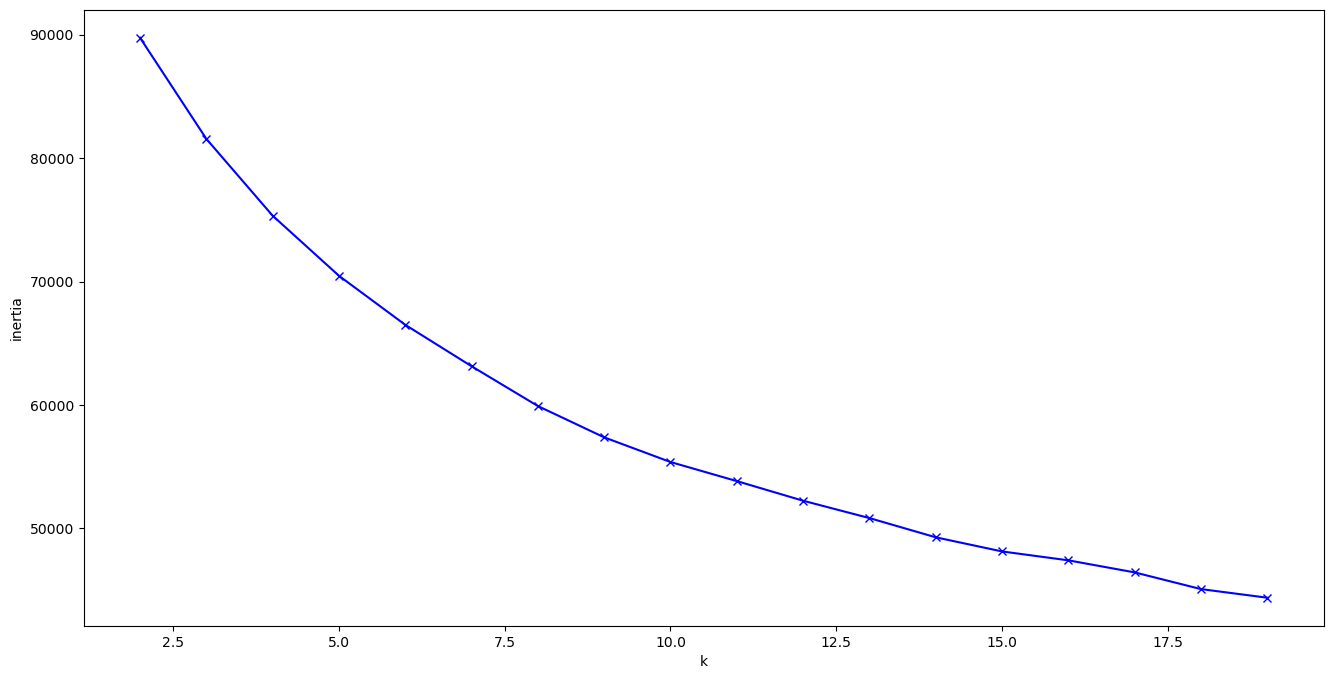

In [20]:
# We try out different values for K, since grouping music in just 2 categories is just not
# useful we start off with 10
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')
plt.show()

We dont have a clear elbow point here, we try to improve with PCA

# Principal Component Analysis

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA()
pca.fit(df_normalized)

PCA()

#### Inspecting the components

In [23]:
pca.explained_variance_ratio_.round(2)

array([0.27, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.07, 0.04, 0.03, 0.02])

In [24]:
pca.explained_variance_ratio_[:8].sum()

0.9092276486032733

Apparently we need a lot of the components to not loose too much information, nevertheless we retry to model with the reduced dimensions.

# Modeling with reduced dimensions

#### Setting PCA to 85%

In [25]:
pca = PCA(0.85)
pca.fit(df_normalized)

PCA(n_components=0.85)

In [26]:
# Applying to our data
df_normalized_pca = pca.transform(df_normalized)

#### Model

D:\Users\Giancarlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Giancarlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Giancarlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Giancarlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Giancarlo\anaconda3\lib\site-pa

NameError: name 'np' is not defined

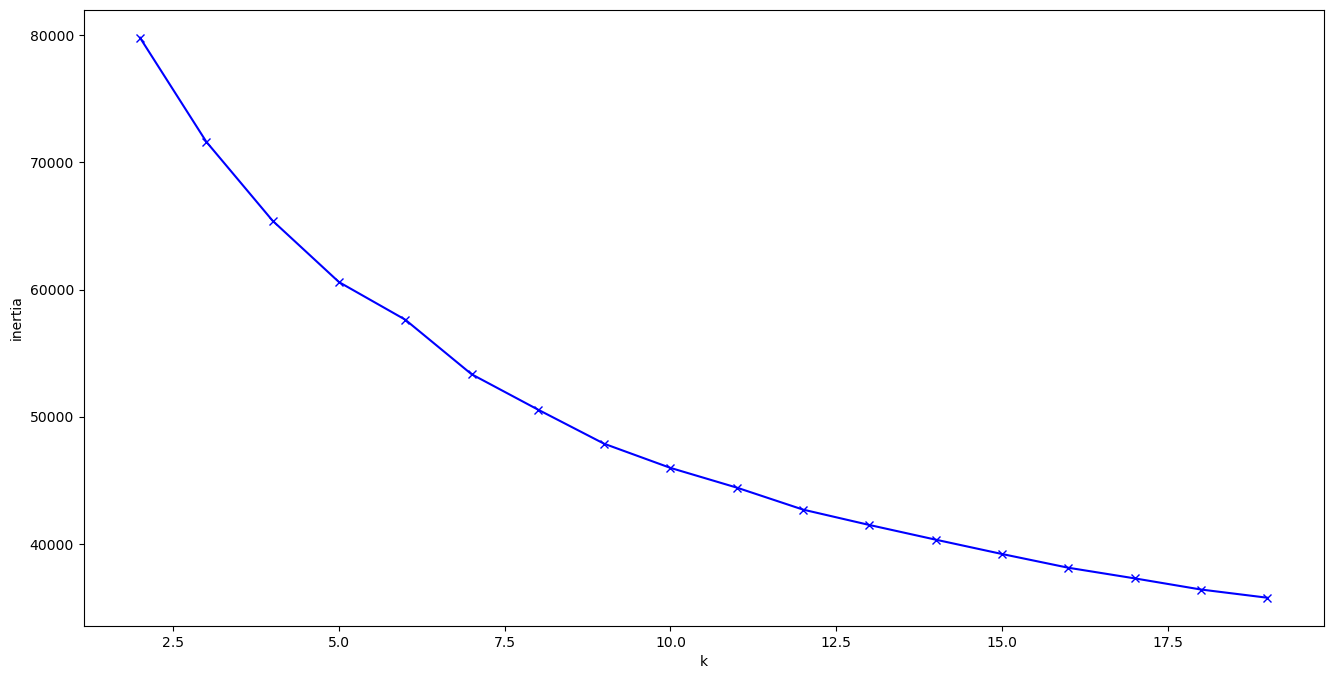

In [27]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_normalized_pca)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')
plt.show()

The curve looks a little bit more defined, I would still apply K = 10

#### Comparing

In [28]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(df_normalized)
kmeans.inertia_ 

D:\Users\Giancarlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


55715.27748456533

In [29]:
kmeans_pca = KMeans(n_clusters=10)
kmeans_pca.fit(df_normalized_pca)
kmeans_pca.inertia_ 

D:\Users\Giancarlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


46123.55646321793

# Saving the classifier
We save the PCA treated model because of the lower inertia.

In [30]:
import pickle

In [31]:
pickle.dump(kmeans_pca, open('kmeans10.p', 'wb'))

In [32]:
pickle.dump(pca, open('pca.p', 'wb'))

In [33]:
pickle.dump(scaler, open('scaler.p', 'wb'))